开始梯度下降训练...
Iteration 0: w=1.7630, b=0.2669, loss=24.8805
Iteration 10: w=2.5710, b=0.4059, loss=1.8620
Iteration 20: w=2.5686, b=0.4221, loss=1.8593
Iteration 30: w=2.5663, b=0.4376, loss=1.8569
Iteration 40: w=2.5641, b=0.4523, loss=1.8547
Iteration 50: w=2.5620, b=0.4663, loss=1.8527
Iteration 60: w=2.5600, b=0.4796, loss=1.8508
Iteration 70: w=2.5581, b=0.4923, loss=1.8492
Iteration 80: w=2.5562, b=0.5044, loss=1.8477
Iteration 90: w=2.5545, b=0.5158, loss=1.8464

最终结果: w=2.5530, b=0.5257
真实值: w=2.5000, b=1.0000


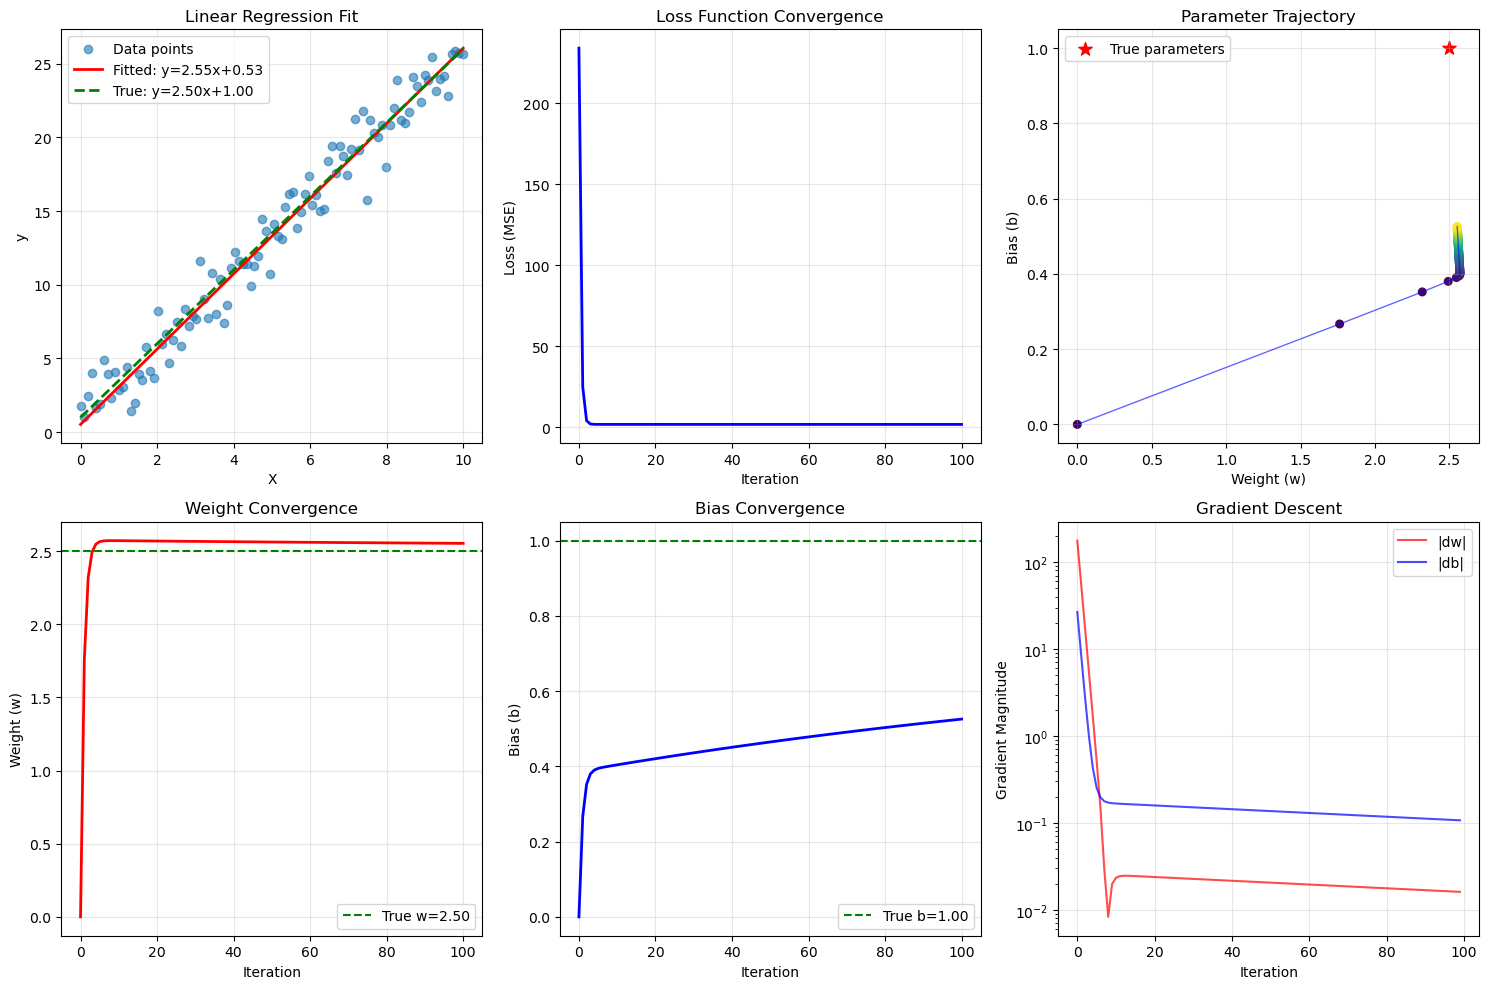


交互式梯度下降演示


interactive(children=(FloatSlider(value=0.01, description='学习率:', max=0.1, min=0.001, readout_format='.3f', st…


生成3D损失函数表面图...


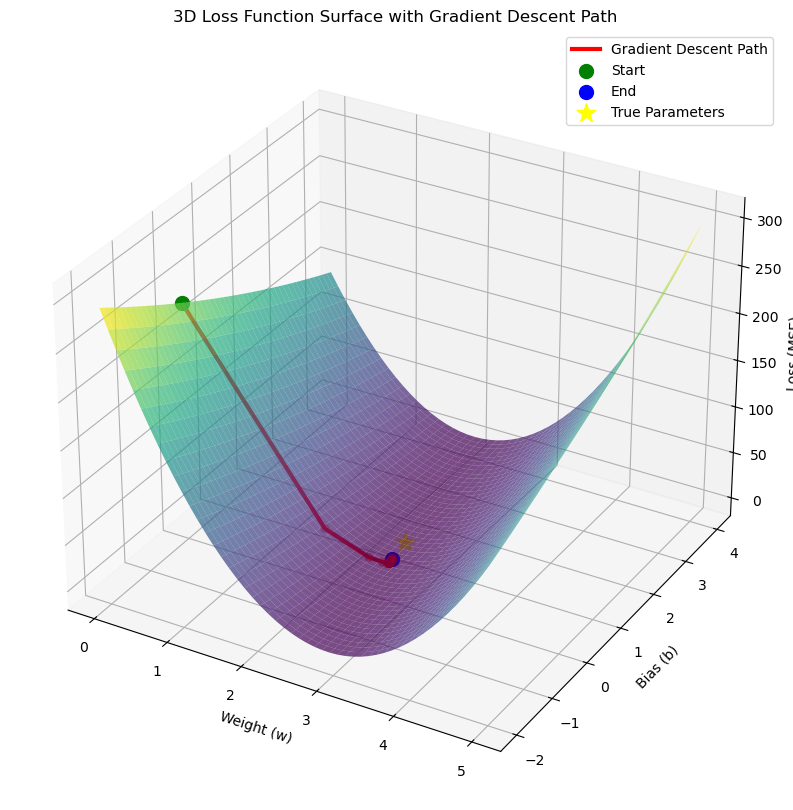

In [1]:
# 首先安装必要的库（如果在Jupyter中运行，取消注释下面这行）
# !pip install numpy matplotlib ipywidgets

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# 设置随机种子以便重现结果
np.random.seed(42)

# 1. 生成模拟数据
def generate_data(n_samples=100):
    """生成线性回归数据 y = 2.5x + 1.0 + 噪声"""
    X = np.linspace(0, 10, n_samples)
    true_w = 2.5  # 真实权重
    true_b = 1.0  # 真实偏置
    y = true_w * X + true_b + np.random.normal(0, 1.5, n_samples)  # 添加高斯噪声
    return X, y, true_w, true_b

X, y, true_w, true_b = generate_data()

# 2. 定义线性回归和损失函数
def linear_regression(X, w, b):
    """线性回归模型"""
    return w * X + b

def mean_squared_error(y_true, y_pred):
    """均方误差损失函数"""
    return np.mean((y_true - y_pred) ** 2)

def compute_gradients(X, y, w, b):
    """计算梯度"""
    n = len(X)
    y_pred = linear_regression(X, w, b)
    
    # 计算梯度
    dw = (-2/n) * np.dot(X, (y - y_pred))  # w的梯度
    db = (-2/n) * np.sum(y - y_pred)       # b的梯度
    
    return dw, db

# 3. 梯度下降实现
def gradient_descent(X, y, w_init=0, b_init=0, learning_rate=0.01, n_iterations=100):
    """执行梯度下降并记录每一步的参数和损失"""
    w, b = w_init, b_init
    history = {
        'w': [w],
        'b': [b],
        'loss': [mean_squared_error(y, linear_regression(X, w, b))],
        'dw': [],
        'db': []
    }
    
    for i in range(n_iterations):
        # 计算梯度
        dw, db = compute_gradients(X, y, w, b)
        
        # 更新参数
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # 记录历史
        history['w'].append(w)
        history['b'].append(b)
        history['loss'].append(mean_squared_error(y, linear_regression(X, w, b)))
        history['dw'].append(dw)
        history['db'].append(db)
        
        # 每10次迭代打印一次进度
        if i % 10 == 0:
            print(f"Iteration {i}: w={w:.4f}, b={b:.4f}, loss={history['loss'][-1]:.4f}")
    
    return w, b, history

# 4. 执行梯度下降
print("开始梯度下降训练...")
final_w, final_b, history = gradient_descent(X, y, w_init=0, b_init=0, 
                                             learning_rate=0.01, n_iterations=100)
print(f"\n最终结果: w={final_w:.4f}, b={final_b:.4f}")
print(f"真实值: w={true_w:.4f}, b={true_b:.4f}")

# 5. 可视化结果
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 子图1: 原始数据和拟合线
ax1 = axes[0, 0]
ax1.scatter(X, y, alpha=0.6, label='Data points')
ax1.plot(X, linear_regression(X, final_w, final_b), 'r-', linewidth=2, label=f'Fitted: y={final_w:.2f}x+{final_b:.2f}')
ax1.plot(X, linear_regression(X, true_w, true_b), 'g--', linewidth=2, label=f'True: y={true_w:.2f}x+{true_b:.2f}')
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Linear Regression Fit')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 子图2: 损失函数下降曲线
ax2 = axes[0, 1]
ax2.plot(history['loss'], 'b-', linewidth=2)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Loss (MSE)')
ax2.set_title('Loss Function Convergence')
ax2.grid(True, alpha=0.3)

# 子图3: w和b的变化轨迹
ax3 = axes[0, 2]
ax3.plot(history['w'], history['b'], 'b-', linewidth=1, alpha=0.6)
ax3.scatter(history['w'], history['b'], c=range(len(history['w'])), cmap='viridis', s=30)
ax3.scatter([true_w], [true_b], color='red', s=100, marker='*', label='True parameters')
ax3.set_xlabel('Weight (w)')
ax3.set_ylabel('Bias (b)')
ax3.set_title('Parameter Trajectory')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 子图4: w的变化
ax4 = axes[1, 0]
ax4.plot(history['w'], 'r-', linewidth=2)
ax4.axhline(y=true_w, color='g', linestyle='--', label=f'True w={true_w:.2f}')
ax4.set_xlabel('Iteration')
ax4.set_ylabel('Weight (w)')
ax4.set_title('Weight Convergence')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 子图5: b的变化
ax5 = axes[1, 1]
ax5.plot(history['b'], 'b-', linewidth=2)
ax5.axhline(y=true_b, color='g', linestyle='--', label=f'True b={true_b:.2f}')
ax5.set_xlabel('Iteration')
ax5.set_ylabel('Bias (b)')
ax5.set_title('Bias Convergence')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 子图6: 梯度变化
ax6 = axes[1, 2]
ax6.plot(np.abs(history['dw']), 'r-', label='|dw|', alpha=0.7)
ax6.plot(np.abs(history['db']), 'b-', label='|db|', alpha=0.7)
ax6.set_xlabel('Iteration')
ax6.set_ylabel('Gradient Magnitude')
ax6.set_title('Gradient Descent')
ax6.set_yscale('log')  # 使用对数刻度更好显示梯度下降
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. 创建交互式部件，探索不同学习率的影响
def interactive_gradient_descent(learning_rate=0.01, n_iterations=100):
    """交互式梯度下降演示"""
    # 执行梯度下降
    w_final, b_final, hist = gradient_descent(
        X, y, w_init=0, b_init=0, 
        learning_rate=learning_rate, 
        n_iterations=n_iterations
    )
    
    # 创建可视化
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # 左图: 数据和拟合线
    axes[0].scatter(X, y, alpha=0.5, label='Data points')
    
    # 绘制几条关键迭代的线
    iter_indices = [0, n_iterations//4, n_iterations//2, n_iterations-1]
    colors = ['gray', 'orange', 'blue', 'red']
    labels = ['Initial', f'Iter {n_iterations//4}', f'Iter {n_iterations//2}', 'Final']
    
    for idx, color, label in zip(iter_indices, colors, labels):
        if idx < len(hist['w']):
            w_temp, b_temp = hist['w'][idx], hist['b'][idx]
            axes[0].plot(X, linear_regression(X, w_temp, b_temp), 
                       color=color, alpha=0.7, linewidth=2, label=f'{label}: y={w_temp:.2f}x+{b_temp:.2f}')
    
    axes[0].plot(X, linear_regression(X, true_w, true_b), 'g--', 
                linewidth=2, label=f'True: y={true_w:.2f}x+{true_b:.2f}')
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('y')
    axes[0].set_title(f'Linear Regression (LR={learning_rate})')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 右图: 损失函数下降
    axes[1].plot(hist['loss'], 'b-', linewidth=2)
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('Loss (MSE)')
    axes[1].set_title(f'Loss Convergence (Final loss={hist["loss"][-1]:.4f})')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 打印最终结果
    print(f"\n最终参数: w={w_final:.4f}, b={b_final:.4f}")
    print(f"最终损失: {hist['loss'][-1]:.4f}")
    print(f"与真实参数误差: w误差={abs(w_final-true_w):.4f}, b误差={abs(b_final-true_b):.4f}")

# 7. 创建交互式控制面板
print("\n" + "="*60)
print("交互式梯度下降演示")
print("="*60)

# 使用滑块控制参数
interact(interactive_gradient_descent,
         learning_rate=widgets.FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001, 
                                           description='学习率:', readout_format='.3f'),
         n_iterations=widgets.IntSlider(value=50, min=10, max=200, step=10, 
                                        description='迭代次数:'))

# 8. 额外的可视化：3D损失函数表面
print("\n生成3D损失函数表面图...")

# 创建参数网格
w_range = np.linspace(0, 5, 50)
b_range = np.linspace(-2, 4, 50)
W, B = np.meshgrid(w_range, b_range)

# 计算网格上每个点的损失
loss_grid = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        y_pred = linear_regression(X, W[i, j], B[i, j])
        loss_grid[i, j] = mean_squared_error(y, y_pred)

# 绘制3D图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制损失表面
surf = ax.plot_surface(W, B, loss_grid, cmap='viridis', alpha=0.7)

# 绘制梯度下降路径
ax.plot3D(history['w'], history['b'], history['loss'], 'r-', linewidth=3, label='Gradient Descent Path')
ax.scatter3D(history['w'], history['b'], history['loss'], c='red', s=30)

# 标记起点和终点
ax.scatter3D([history['w'][0]], [history['b'][0]], [history['loss'][0]], 
            color='green', s=100, label='Start')
ax.scatter3D([history['w'][-1]], [history['b'][-1]], [history['loss'][-1]], 
            color='blue', s=100, label='End')
ax.scatter3D([true_w], [true_b], [mean_squared_error(y, linear_regression(X, true_w, true_b))], 
            color='yellow', s=200, marker='*', label='True Parameters')

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss (MSE)')
ax.set_title('3D Loss Function Surface with Gradient Descent Path')
ax.legend()
plt.show()